In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

## 1. Activness 데이터 EDA

### 1.1 File Info.
- 일별 Active 유저수 (국가별, 기준별, 플랫폼별 구분)
- 데이터 포멧이 일반적인 포멧과 다름 (대부분 카테고리 변수, 하나의 컬럼만 집계된 결과)

In [2]:
df = pd.read_table("kuiData.tsv", sep='\t', low_memory=False)

In [3]:
df.head(10)

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
0,1475852400,all,1,1,1,0,--,9.0
1,1475852400,all,1,1,1,0,A1,6.0
2,1475852400,all,1,1,1,0,AF,21.0
3,1475852400,all,1,1,1,0,AI,1.0
4,1475852400,all,1,1,1,0,AL,308.0
5,1475852400,all,1,1,1,0,AO,184.0
6,1475852400,all,1,1,1,0,AR,23123.0
7,1475852400,all,1,1,1,0,AU,2967.0
8,1475852400,all,1,1,1,0,AX,1.0
9,1475852400,all,1,1,1,0,BB,23.0


In [4]:
df.tail()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
249290,1476543600,view,ALL,ALL,ALL,ALL,ZA,4846.0
249291,1476543600,view,ALL,ALL,ALL,ALL,ZM,234.0
249292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249294,���� ����,If Android = ostype = 1 & Aswtype = 1,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 전처리
- 불필요 변수 제거, 필터링
- 데이터 타입 변환
- 결측치 처리

In [5]:
# slicing based on row numbers
df = df.ix[:len(df)-4]

In [6]:
df.tail()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
249287,1476543600,view,ALL,ALL,ALL,ALL,VN,6956.0
249288,1476543600,view,ALL,ALL,ALL,ALL,WS,1.0
249289,1476543600,view,ALL,ALL,ALL,ALL,YE,193.0
249290,1476543600,view,ALL,ALL,ALL,ALL,ZA,4846.0
249291,1476543600,view,ALL,ALL,ALL,ALL,ZM,234.0


In [7]:
df[df['countryCode'] == '--'].head(10)

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
0,1475852400,all,1,1,1,0,--,9.0
274,1475852400,all,1,1,ALL,ALL,--,9.0
488,1475852400,all,1,2,ALL,0,--,1.0
572,1475852400,all,1,2,ALL,ALL,--,1.0
689,1475852400,all,1,5,ALL,ALL,--,1.0
795,1475852400,all,1,ALL,1,ALL,--,9.0
2401,1475852400,all,6,3,6,ALL,--,4.0
2599,1475852400,all,6,4,6,0,--,1.0
2925,1475852400,all,6,ALL,ALL,ALL,--,4.0
3231,1475852400,all,ALL,1,ALL,0,--,9.0


In [8]:
len(df[df['countryCode'] == '--'])

1104

In [9]:
df = df[df['countryCode'] != '--']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248188 entries, 1 to 249291
Data columns (total 8 columns):
datetime        248188 non-null object
dataType        248188 non-null object
deviceTypeNo    248188 non-null object
osTypeNo        248188 non-null object
aswTypeNo       248188 non-null object
isPaid          248188 non-null object
countryCode     247290 non-null object
userCount       248188 non-null float64
dtypes: float64(1), object(7)
memory usage: 17.0+ MB


In [11]:
df[df['countryCode'].isnull()].head(10)

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
161,1475852400,all,1,1,1,ALL,NaN,273.0
396,1475852400,all,1,2,1,0,NaN,7.0
925,1475852400,all,1,ALL,ALL,0,NaN,280.0
1160,1475852400,all,2,3,ALL,0,NaN,1.0
1216,1475852400,all,2,3,ALL,ALL,NaN,1.0
1507,1475852400,all,2,ALL,ALL,ALL,NaN,1.0
2365,1475852400,all,6,3,6,0,NaN,6.0
2504,1475852400,all,6,3,ALL,0,NaN,6.0
2578,1475852400,all,6,3,ALL,ALL,NaN,6.0
2755,1475852400,all,6,ALL,6,0,NaN,6.0


In [12]:
df = df.dropna(subset=['countryCode'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247290 entries, 1 to 249291
Data columns (total 8 columns):
datetime        247290 non-null object
dataType        247290 non-null object
deviceTypeNo    247290 non-null object
osTypeNo        247290 non-null object
aswTypeNo       247290 non-null object
isPaid          247290 non-null object
countryCode     247290 non-null object
userCount       247290 non-null float64
dtypes: float64(1), object(7)
memory usage: 17.0+ MB


In [14]:
# type convert
df['datetime'] = pd.to_datetime(df['datetime'], unit='s').dt.date # timestamp to datetime of pd
df['userCount'] = df['userCount'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247290 entries, 1 to 249291
Data columns (total 8 columns):
datetime        247290 non-null object
dataType        247290 non-null object
deviceTypeNo    247290 non-null object
osTypeNo        247290 non-null object
aswTypeNo       247290 non-null object
isPaid          247290 non-null object
countryCode     247290 non-null object
userCount       247290 non-null int64
dtypes: int64(1), object(7)
memory usage: 17.0+ MB


In [16]:
df.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,all,1,1,1,0,A1,6
2,2016-10-07,all,1,1,1,0,AF,21
3,2016-10-07,all,1,1,1,0,AI,1
4,2016-10-07,all,1,1,1,0,AL,308
5,2016-10-07,all,1,1,1,0,AO,184


In [17]:
df.datetime.value_counts().sort_index()

2016-10-07    27000
2016-10-08    26616
2016-10-09    27690
2016-10-10    28060
2016-10-11    28095
2016-10-12    27803
2016-10-13    28322
2016-10-14    27257
2016-10-15    26447
Name: datetime, dtype: int64

### 1.3 유니크 값 확인을 위한 EDA

- dataType
    - if dataType == 'view', View only => 단순한 하나의 행동으로 activeness 판정
    - if dataType == 'all', View and (Edit or Export) => 보다 다양한 행동 측정
- Other categorical variables
    - if 'ALL': 모든 유저 
    - if 숫자 코드: 세부 그룹

In [18]:
df.dataType.value_counts() # dataType 구분을 위한 중요한 조건

all     145117
view    102173
Name: dataType, dtype: int64

In [19]:
df.deviceTypeNo.value_counts()

ALL    109446
1       55878
6       35078
3       34172
2       12716
Name: deviceTypeNo, dtype: int64

In [20]:
df.osTypeNo.value_counts()

ALL    81693
3      48595
1      45350
2      34639
4      23743
5       6832
7       5552
0        838
6         48
Name: osTypeNo, dtype: int64

- osTypeNo code
    - Android = 1
    - iOS = 2
    - Windows = 3
    - Mac = 4

In [21]:
df.aswTypeNo.value_counts()

ALL    109446
1       55878
6       35078
3       34172
2       12716
Name: aswTypeNo, dtype: int64

In [22]:
df.isPaid.value_counts()

ALL    109455
0      109213
1       28622
Name: isPaid, dtype: int64

In [23]:
df.countryCode.value_counts()

ALL    2901
US     2693
KR     2660
JP     2379
GB     2317
MX     2263
ES     2259
IT     2253
BR     2221
DE     2193
       ... 
PW      224
SB      224
FM      200
MF      192
GL      176
WS      128
CF      128
YT      128
CK       64
KI       48
Name: countryCode, Length: 229, dtype: int64

In [24]:
df.userCount.describe().round(2)

count     247290.00
mean        2197.73
std        29970.39
min            1.00
25%            2.00
50%            9.00
75%           80.00
max      1172697.00
Name: userCount, dtype: float64

### 1.4 dataType 구분후 EDA
- if dataType == 'all', View + Edit + Export
- if dataType == 'view', View only
- if values = 'ALL': 모든 범주변인의 합산
- **all and ALL are different vales**

In [25]:
# df all-base active
df_all = df.query("dataType == 'all'")

# df view-base active
df_view = df.query("dataType == 'view'")

In [26]:
print(len(df_all))
print(len(df_view))

145117
102173


In [27]:
df_all.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,all,1,1,1,0,A1,6
2,2016-10-07,all,1,1,1,0,AF,21
3,2016-10-07,all,1,1,1,0,AI,1
4,2016-10-07,all,1,1,1,0,AL,308
5,2016-10-07,all,1,1,1,0,AO,184


In [28]:
df_view.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
5309,2016-10-07,view,1,1,1,0,A1,6
5310,2016-10-07,view,1,1,1,0,AF,21
5311,2016-10-07,view,1,1,1,0,AL,275
5312,2016-10-07,view,1,1,1,0,AO,161
5313,2016-10-07,view,1,1,1,0,AR,21337


In [29]:
# all base total
df_all_tot = df_all.query("deviceTypeNo == 'ALL' & osTypeNo == 'ALL' & aswTypeNo == 'ALL' & isPaid == 'ALL' & countryCode == 'ALL'")

# view base total
df_view_tot = df_view.query("deviceTypeNo == 'ALL' & osTypeNo == 'ALL' & aswTypeNo == 'ALL' & isPaid == 'ALL' & countryCode == 'ALL'")

In [30]:
# view + edit + export
df_all_tot.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
14316,2016-10-07,all,ALL,ALL,ALL,ALL,ALL,897602
41320,2016-10-08,all,ALL,ALL,ALL,ALL,ALL,792150
68748,2016-10-09,all,ALL,ALL,ALL,ALL,ALL,1014554
96845,2016-10-10,all,ALL,ALL,ALL,ALL,ALL,1118078
125108,2016-10-11,all,ALL,ALL,ALL,ALL,ALL,1125967


In [31]:
# view only
df_view_tot.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
8971,2016-10-07,view,ALL,ALL,ALL,ALL,ALL,784724
36041,2016-10-08,view,ALL,ALL,ALL,ALL,ALL,668074
63238,2016-10-09,view,ALL,ALL,ALL,ALL,ALL,895476
91303,2016-10-10,view,ALL,ALL,ALL,ALL,ALL,1009002
119572,2016-10-11,view,ALL,ALL,ALL,ALL,ALL,1007868


In [32]:
## BASE LINE
## bring previous DAU index for comparison

# index
dates_idx = pd.date_range('20161007', periods=9)

# values
dau = pd.Series([1097686, 966350, 1264246, 1388723, 1389716, 1401294, 1367030, 1143068, 1011094], index=dates_idx)

In [33]:
dau # if the app activated, counted!

2016-10-07    1097686
2016-10-08     966350
2016-10-09    1264246
2016-10-10    1388723
2016-10-11    1389716
2016-10-12    1401294
2016-10-13    1367030
2016-10-14    1143068
2016-10-15    1011094
Freq: D, dtype: int64

In [34]:
df_all_tot.groupby("datetime")['userCount'].sum()

datetime
2016-10-07     897602
2016-10-08     792150
2016-10-09    1014554
2016-10-10    1118078
2016-10-11    1125967
2016-10-12    1137472
2016-10-13    1172697
2016-10-14     915171
2016-10-15     777353
Name: userCount, dtype: int64

In [35]:
df_view_tot.groupby("datetime")['userCount'].sum()

datetime
2016-10-07     784724
2016-10-08     668074
2016-10-09     895476
2016-10-10    1009002
2016-10-11    1007868
2016-10-12    1012543
2016-10-13     982975
2016-10-14     788809
2016-10-15     675327
Name: userCount, dtype: int64

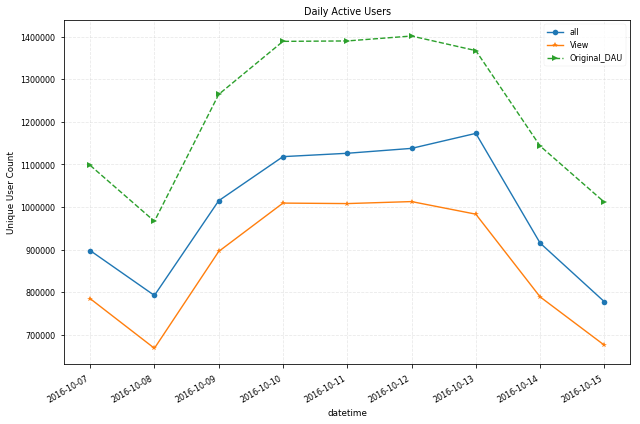

In [36]:
plt.figure(figsize=(9,6))

df_all_tot.groupby("datetime")['userCount'].sum().plot(marker='o', label='all');
df_view_tot.groupby("datetime")['userCount'].sum().plot(marker='*', label='View');
dau.plot(marker='>', linestyle='dashed', label='Original_DAU');

plt.title("Daily Active Users")
plt.ylabel("Unique User Count")
#plt.ylim(400000, 1500000)
#plt.grid(color='lightgray')
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### Note

- There are gap between Original DAU, all, view (the gap will represent the vanity of DAU)
- The trend of those three seems similar
- The condition of **'all'** may be a good fit for activeness
    - If considering only 'view' will miss many opportunities such as edit, export

### 1.6. Activeness based on View by Platform
- Let's drop the 'view only' condition from now on and focus on only 'all' condition

In [37]:
df_all.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,all,1,1,1,0,A1,6
2,2016-10-07,all,1,1,1,0,AF,21
3,2016-10-07,all,1,1,1,0,AI,1
4,2016-10-07,all,1,1,1,0,AL,308
5,2016-10-07,all,1,1,1,0,AO,184


In [38]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145117 entries, 1 to 245602
Data columns (total 8 columns):
datetime        145117 non-null object
dataType        145117 non-null object
deviceTypeNo    145117 non-null object
osTypeNo        145117 non-null object
aswTypeNo       145117 non-null object
isPaid          145117 non-null object
countryCode     145117 non-null object
userCount       145117 non-null int64
dtypes: int64(1), object(7)
memory usage: 10.0+ MB


- osTypeNo code
    - Android = 1
    - iOS = 2
    - Windows = 3
    - Mac = 4

In [39]:
df_all.osTypeNo.value_counts()

ALL    48069
3      32176
1      23899
2      18317
4      15624
5       3480
7       2888
0        632
6         32
Name: osTypeNo, dtype: int64

In [40]:
def df_by_ostype(df, ostype, excl = 'ALL'):

    df = df[(df['osTypeNo'] == ostype) & (df['deviceTypeNo'] == excl) \
            & (df['aswTypeNo'] == excl) & (df['isPaid'] == excl) & (df['countryCode'] == excl)]

    return df

In [41]:
# create 4 df based on the condition above
df_aos = df_by_ostype(df_all, '1')
df_ios = df_by_ostype(df_all, '2')
df_win = df_by_ostype(df_all, '3')
df_mac = df_by_ostype(df_all, '4')

In [42]:
#df_aos
df_ios
#df_win
#df_mac

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
3672,2016-10-07,all,ALL,2,ALL,ALL,ALL,44495
30837,2016-10-08,all,ALL,2,ALL,ALL,ALL,44712
57810,2016-10-09,all,ALL,2,ALL,ALL,ALL,58844
85730,2016-10-10,all,ALL,2,ALL,ALL,ALL,61874
114020,2016-10-11,all,ALL,2,ALL,ALL,ALL,60862
142339,2016-10-12,all,ALL,2,ALL,ALL,ALL,60654
170467,2016-10-13,all,ALL,2,ALL,ALL,ALL,57881
198902,2016-10-14,all,ALL,2,ALL,ALL,ALL,47747
226238,2016-10-15,all,ALL,2,ALL,ALL,ALL,47296


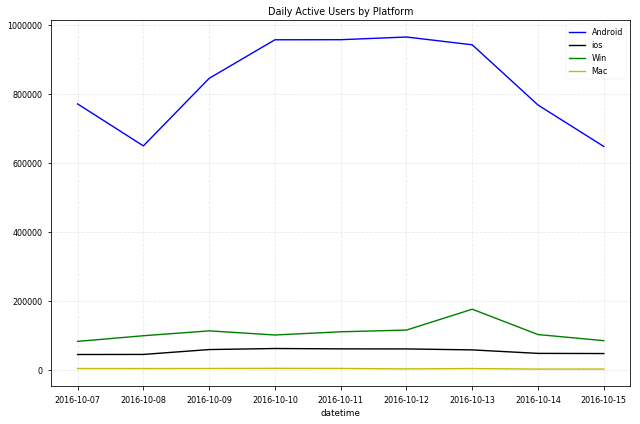

In [43]:
fig = plt.figure(figsize=(9,6))

df_aos.groupby("datetime").sum()['userCount'].plot(label='Android', c='b');
df_ios.groupby("datetime").sum()['userCount'].plot(label='ios', c='k');
df_win.groupby("datetime").sum()['userCount'].plot(label='Win', c='g');
df_mac.groupby("datetime").sum()['userCount'].plot(label='Mac', c='y');

plt.title("Daily Active Users by Platform")
plt.legend()
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

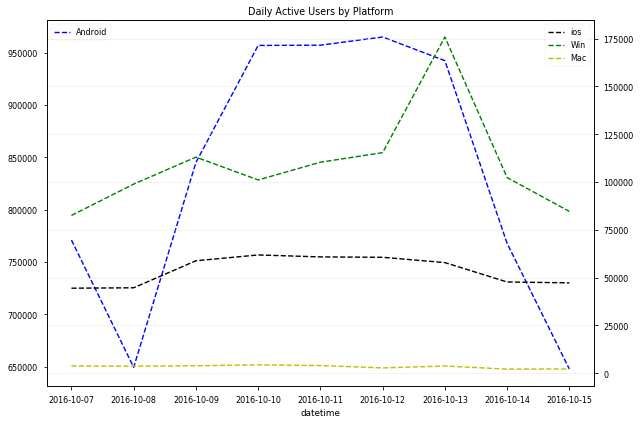

In [44]:
fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(111)
#df_view.groupby("datetime").sum()['userCount'].plot(label='View', ax=ax, marker='o', c='r')
df_aos.groupby("datetime").sum()['userCount'].plot(label='Android', ax=ax, linestyle='dashed', c='b');

ax2 = ax.twinx()
df_ios.groupby("datetime").sum()['userCount'].plot(label='ios', ax=ax2, c='k', linestyle='dashed');
df_win.groupby("datetime").sum()['userCount'].plot(label='Win', ax=ax2, c='g', linestyle='dashed');
df_mac.groupby("datetime").sum()['userCount'].plot(label='Mac', ax=ax2, c='y', linestyle='dashed');

plt.title("Daily Active Users by Platform")
ax.legend(loc=2)
ax2.legend(loc=1)
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

<Figure size 648x432 with 0 Axes>

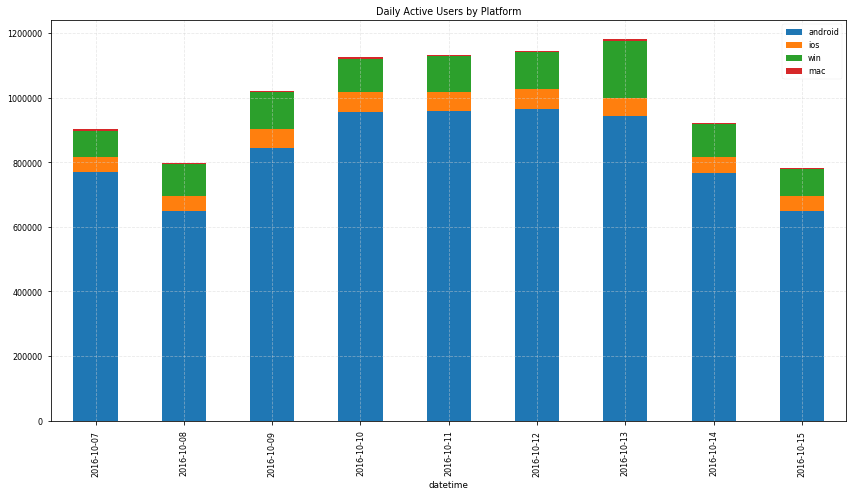

In [45]:
plt.figure(figsize=(9,6))

aos = df_aos.groupby("datetime").sum()['userCount']
ios = df_ios.groupby("datetime").sum()['userCount']
win = df_win.groupby("datetime").sum()['userCount']
mac = df_mac.groupby("datetime").sum()['userCount']

# create a df
plf = pd.concat([aos, ios, win, mac], axis=1)
plf.columns = ['android', 'ios', 'win', 'mac']

# plot
plf.plot(kind='bar', stacked=True, figsize=(12,7));

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### 1.7 Activeness based on View by isPaid

In [46]:
df_all.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,all,1,1,1,0,A1,6
2,2016-10-07,all,1,1,1,0,AF,21
3,2016-10-07,all,1,1,1,0,AI,1
4,2016-10-07,all,1,1,1,0,AL,308
5,2016-10-07,all,1,1,1,0,AO,184


In [47]:
df_all.isPaid.value_counts()

ALL    64176
0      64056
1      16885
Name: isPaid, dtype: int64

- isPaid code
    - 0: Free
    - 1: Paid

In [48]:
def df_by_ispaid(df, paidcode, excl = 'ALL'):

    df = df[(df['osTypeNo'] == excl) & (df['deviceTypeNo'] == excl) \
            & (df['aswTypeNo'] == excl) & (df['isPaid'] == paidcode) & (df['countryCode'] == excl)]

    return df

In [49]:
df_free = df_by_ispaid(df_all, '0')
df_paid = df_by_ispaid(df_all, '1')

In [50]:
df_free.head(10)

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
14209,2016-10-07,all,ALL,ALL,ALL,0,ALL,895125
41217,2016-10-08,all,ALL,ALL,ALL,0,ALL,789819
68641,2016-10-09,all,ALL,ALL,ALL,0,ALL,1011593
96739,2016-10-10,all,ALL,ALL,ALL,0,ALL,1114967
124999,2016-10-11,all,ALL,ALL,ALL,0,ALL,1122786
153225,2016-10-12,all,ALL,ALL,ALL,0,ALL,1134352
181534,2016-10-13,all,ALL,ALL,ALL,0,ALL,1169316
209586,2016-10-14,all,ALL,ALL,ALL,0,ALL,912549
236610,2016-10-15,all,ALL,ALL,ALL,0,ALL,775113


In [51]:
df_paid.head(10)

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
23301,2016-10-07,all,ALL,ALL,ALL,1,ALL,2477
50195,2016-10-08,all,ALL,ALL,ALL,1,ALL,2331
77940,2016-10-09,all,ALL,ALL,ALL,1,ALL,2961
106169,2016-10-10,all,ALL,ALL,ALL,1,ALL,3111
134404,2016-10-11,all,ALL,ALL,ALL,1,ALL,3181
162570,2016-10-12,all,ALL,ALL,ALL,1,ALL,3120
191055,2016-10-13,all,ALL,ALL,ALL,1,ALL,3381
218750,2016-10-14,all,ALL,ALL,ALL,1,ALL,2622
245501,2016-10-15,all,ALL,ALL,ALL,1,ALL,2240


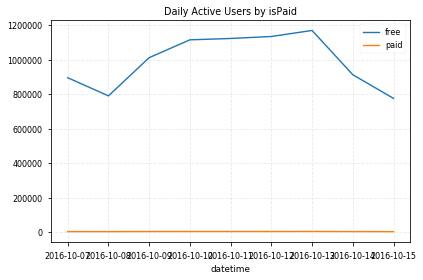

In [52]:
fig = plt.figure()

df_free.groupby("datetime")['userCount'].sum().plot(label='free');
df_paid.groupby("datetime")['userCount'].sum().plot(label='paid');

plt.title("Daily Active Users by isPaid")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

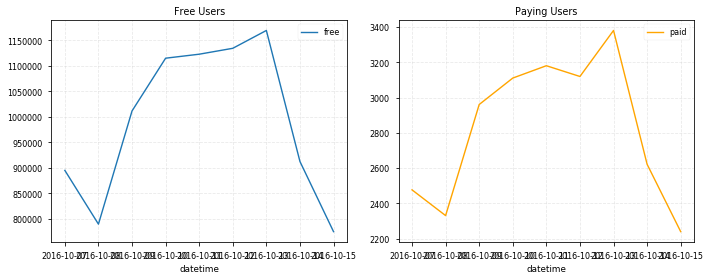

In [53]:
fig, ax = plt.subplots(1, 2)

df_free.groupby("datetime")['userCount'].sum().plot(label='free', ax=ax[0], figsize=(10,4));
ax[0].set_title("Free Users")
ax[0].legend()
ax[0].grid(color='lightgrey', alpha=0.5, linestyle='--')

df_paid.groupby("datetime")['userCount'].sum().plot(label='paid', ax=ax[1], color='orange');
ax[1].set_title("Paying Users")
ax[1].legend()
ax[1].grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()

#### Code Info.
- osType & isPaid cross
    - osType
        - Android = 1
        - iOS = 2
        - Windows = 3
        - Mac = 4
    - isPaid
        - 0: Free
        - 1: Paid

In [54]:
def df_by_ostype_ispaid(df, ostype, paidcode, excl = 'ALL'):

    df = df[(df['osTypeNo'] == ostype) & (df['deviceTypeNo'] == excl) \
            & (df['aswTypeNo'] == excl) & (df['isPaid'] == paidcode) & (df['countryCode'] == excl)]

    return df

In [55]:
# AOS
df_aos_free = df_by_ostype_ispaid(df_all, '1', '0')
df_aos_paid = df_by_ostype_ispaid(df_all, '1', '1')

# iOS
df_ios_free = df_by_ostype_ispaid(df_all, '2', '0')
df_ios_paid = df_by_ostype_ispaid(df_all, '2', '1')

# Win
df_win_free = df_by_ostype_ispaid(df_all, '3', '0')
df_win_paid = df_by_ostype_ispaid(df_all, '3', '1')

# Mac
df_mac_free = df_by_ostype_ispaid(df_all, '4', '0')
df_mac_paid = df_by_ostype_ispaid(df_all, '4', '1')

In [56]:
#df_mac_paid
df_mac_free

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
4399,2016-10-07,all,ALL,4,ALL,0,ALL,3804
31524,2016-10-08,all,ALL,4,ALL,0,ALL,3719
58533,2016-10-09,all,ALL,4,ALL,0,ALL,3913
86472,2016-10-10,all,ALL,4,ALL,0,ALL,4397
114751,2016-10-11,all,ALL,4,ALL,0,ALL,4025
143069,2016-10-12,all,ALL,4,ALL,0,ALL,2789
171226,2016-10-13,all,ALL,4,ALL,0,ALL,3788
199617,2016-10-14,all,ALL,4,ALL,0,ALL,2183
226924,2016-10-15,all,ALL,4,ALL,0,ALL,2244


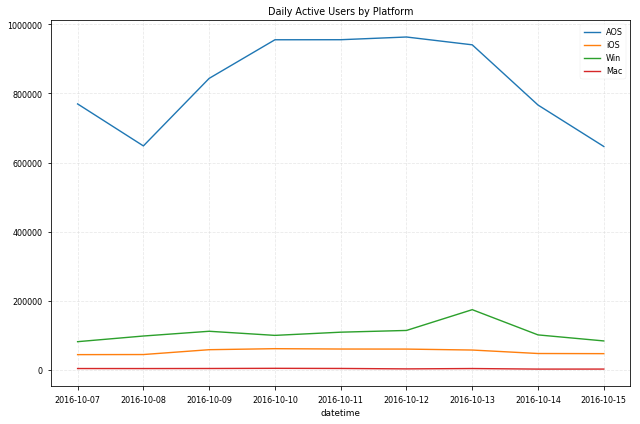

In [57]:
fig = plt.figure(figsize=(9,6))

df_aos_free.groupby("datetime")['userCount'].sum().plot(label='AOS');
df_ios_free.groupby("datetime")['userCount'].sum().plot(label='iOS');
df_win_free.groupby("datetime")['userCount'].sum().plot(label='Win');
df_mac_free.groupby("datetime")['userCount'].sum().plot(label='Mac');

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

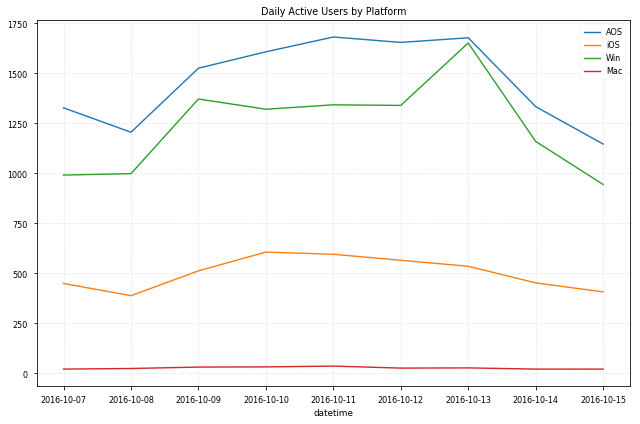

In [58]:
fig = plt.figure(figsize=(9,6))

df_aos_paid.groupby("datetime")['userCount'].sum().plot(label='AOS');
df_ios_paid.groupby("datetime")['userCount'].sum().plot(label='iOS');
df_win_paid.groupby("datetime")['userCount'].sum().plot(label='Win');
df_mac_paid.groupby("datetime")['userCount'].sum().plot(label='Mac');

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### 1.8 Activeness based on View by Country

In [59]:
df_all.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,all,1,1,1,0,A1,6
2,2016-10-07,all,1,1,1,0,AF,21
3,2016-10-07,all,1,1,1,0,AI,1
4,2016-10-07,all,1,1,1,0,AL,308
5,2016-10-07,all,1,1,1,0,AO,184


In [60]:
df_cont = df_all.query("deviceTypeNo == 'ALL' & osTypeNo == 'ALL' \
                        & aswTypeNo == 'ALL' & isPaid == 'ALL' & countryCode != 'ALL'")\
                .query("countryCode != '--'")

In [61]:
df_cont.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
5232,2016-10-07,all,ALL,ALL,ALL,ALL,AE,3890
5233,2016-10-07,all,ALL,ALL,ALL,ALL,AT,1692
5234,2016-10-07,all,ALL,ALL,ALL,ALL,AW,34
5235,2016-10-07,all,ALL,ALL,ALL,ALL,AZ,721
5236,2016-10-07,all,ALL,ALL,ALL,ALL,BA,736


In [62]:
df_cont_pivot = df_cont.groupby(["datetime", "countryCode"])['userCount'].sum().to_frame().unstack().fillna(0).astype(int)

df_cont_pivot

userCount                                                        \
countryCode        A1  A2  AD    AE  AF  AG AI   AL   AM   AO  AP     AR AS   
datetime                                                                      
2016-10-07          7  39   9  3890  28  62  1  338  151  201  21  23955  0   
2016-10-08         11  30   9  4476  30  50  1  272  138  173  21  15849  0   
2016-10-09          7  39  12  4409  28  53  2  362  170  226  32  15045  1   
2016-10-10          9  32  10  4352  34  67  3  364  175  255  26  25377  1   
2016-10-11         17  27  12  4363  16  68  2  367  196  258  31  30792  1   
2016-10-12         16  32  11  4175  32  61  1  369  182  256  39  30787  2   
2016-10-13         11  31  14  3556  28  80  3  378  195  264  38  30588  3   
2016-10-14         11  23  10  3973  38  47  5  310  148  194  22  24551  2   
2016-10-15         11  21   8  4432  35  48  2  236  112  146  15  17414  3   

                                                                               \
countryCode    AT    AU  AW AX   AZ    BA  BB    BD    BE   BF    BG   BH  BI   
datetime                                                                        
2016-10-07   1692  3503  34  1  721   736  34   931  2478  368  1254  400   6   
2016-10-08   1541  3788  27  3  776   659  37   979  2202  282  1052  443   6   
2016-10-09   2239  5327  43  3  870   943  43   921  2949  273  1660  414  10   
2016-10-10   2404  5301  50  3  932  1042  56   787  3184  282  1785  330   7   
2016-10-11   2427  5574  53  1  889   998  42   795  3206  292  1841  353   6   
2016-10-12   2462  5308  64  1  926   951  37   946  3219  327  1769  437   6   
2016-10-13   2383  5406  72  2  893   925  48   837  3365  346  1719  380   8   
2016-10-14   1735  3730  44  2  835   690  38   966  2537  314  1173  453   6   
2016-10-15   1557  3681  40  0  853   581  38  1084  2123  263  1064  574   5   

                                                                               \
countryCode   BJ BM  BN    BO BQ     BR   BS  BT   BW    BY   BZ    CA  CD CF   
datetime                                                                        
2016-10-07   227  4  32  3683  6  44472   51   6  155  1673   98  4151  30  0   
2016-10-08   237  5  26  2618  6  30920   51   7  145  1402   73  3232  25  0   
2016-10-09   234  6  42  3138  6  39926   61  10  193  2343   69  3105  20  0   
2016-10-10   249  5  42  4183  7  52965   81   3  219  2487   92  4153  33  1   
2016-10-11   255  6  33  3963  7  42726   93   4  216  2524  117  5094  28  0   
2016-10-12   237  8  30  4325  7  40600   97   4  211  2459   99  5208  25  2   
2016-10-13   229  4  39  4195  8  51251  103   7  212  2247  109  5411  26  1   
2016-10-14   250  5  34  3506  5  43051   97   7  161  1494   85  4712  30  2   
2016-10-15   180  4  23  2369  3  30378   80   4  127  1248   75  3461  21  0   

                                                                               \
countryCode  CG    CH   CI CK     CL   CM    CN     CO    CR  CU  CV  CW   CY   
datetime                                                                        
2016-10-07    8  1196  543  0  19688  524  3222  34974  4017   9  45  27  231   
2016-10-08    8  1100  468  0  12827  468  3365  24940  2984   6  31  18  200   
2016-10-09    5  1440  524  0  12247  505  3555  28880  3171   4  43  18  297   
2016-10-10    8  1464  661  0  22514  546  3647  39999  4340   4  49  19  332   
2016-10-11    7  1498  641  0  27698  544  3701  38331  4491   9  61  14  321   
2016-10-12   10  1484  589  0  27947  545  3667  38252  4397  11  56  11  322   
2016-10-13    8  1558  605  1  26269  519  3857  37094  4269   5  54  17  324   
2016-10-14   12  1189  482  1  20123  454  3117  33373  3903   6  45  15  217   
2016-10-15    5  1029  367  0  14571  372  2960  21870  2609   5  33  16  211   

                                                                               \
countryCode    CZ     DE DJ   DK  DM    DO    DZ     EC   EE   

In [63]:
df_cont_pivot.columns.get_level_values(1)

Index([u'A1', u'A2', u'AD', u'AE', u'AF', u'AG', u'AI', u'AL', u'AM', u'AO',
       ...
       u'VG', u'VI', u'VN', u'VU', u'WS', u'YE', u'YT', u'ZA', u'ZM', u'ZW'],
      dtype='object', name=u'countryCode', length=228)

In [64]:
# flatten the multi index 
df_cont_pivot.columns = df_cont_pivot.columns.get_level_values(1) 

In [65]:
df_cont_pivot.head()

countryCode,A1,A2,AD,AE,AF,AG,AI,AL,AM,AO,AP,AR,AS,AT,AU,AW,AX,AZ,BA,BB,BD,BE,BF,BG,BH,BI,BJ,BM,BN,BO,BQ,BR,BS,BT,BW,BY,BZ,CA,CD,CF,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,EU,FI,FJ,FK,FM,FO,FR,GA,GB,GD,GE,GF,GG,GH,GI,GL,GM,GN,GP,GQ,GR,GT,GU,GW,GY,HK,HN,HR,HT,HU,ID,IE,IL,IM,IN,IQ,IR,IS,IT,JE,JM,JO,JP,KE,KG,KH,KI,KM,KN,KR,KW,KY,KZ,LA,LB,LC,LI,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MF,MG,MH,MK,ML,MM,MN,MO,MP,MQ,MR,MT,MU,MV,MW,MX,MY,MZ,NC,NE,NG,NI,NL,NO,NP,NR,NZ,OM,PA,PE,PF,PG,PH,PK,PL,PR,PS,PT,PW,PY,QA,RE,RO,RS,RU,RW,SA,SB,SC,SD,SE,SG,SI,SK,SL,SM,SN,SO,SR,SS,ST,SV,SX,SY,SZ,TC,TD,TG,TH,TJ,TL,TM,TN,TR,TT,TW,TZ,UA,UG,US,UY,UZ,VA,VC,VE,VG,VI,VN,VU,WS,YE,YT,ZA,ZM,ZW
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-10-07,7,39,9,3890,28,62,1,338,151,201,21,23955,0,1692,3503,34,1,721,736,34,931,2478,368,1254,400,6,227,4,32,3683,6,44472,51,6,155,1673,98,4151,30,0,8,1196,543,0,19688,524,3222,34974,4017,9,45,27,231,2057,12252,6,568,18,2287,2050,9004,353,6346,14068,24,35,820,76,2,0,2,4516,64,11622,5,45,1,7,2747,4,0,6,10,26,1,2539,6634,34,4,23,3982,1921,1477,206,2320,53571,809,1871,1,55696,230,4316,53,22067,5,1568,1218,9744,2726,237,352,0,2,6,170188,777,9,3150,68,713,9,1,1046,5,4,500,104,534,16,3213,1,334,15,1,16,3,299,104,61,35,40,11,13,9,205,413,18,22,64146,11081,557,8,74,2781,2001,7408,639,354,1,741,656,3412,22537,10,36,13666,7000,7736,859,65,3305,2,1609,763,13,4151,2127,26833,185,4041,1,2,339,1383,2451,677,1227,2,2,588,12,25,6,1,3753,2,276,3,3,1,170,7249,92,2,35,783,9175,563,11753,774,5553,481,49916,1361,438,3,11,7547,4,9,9740,2,0,229,1,6727,331,299
2016-10-08,11,30,9,4476,30,50,1,272,138,173,21,15849,0,1541,3788,27,3,776,659,37,979,2202,282,1052,443,6,237,5,26,2618,6,30920,51,7,145,1402,73,3232,25,0,8,1100,468,0,12827,468,3365,24940,2984,6,31,18,200,1899,11573,5,602,10,1739,2333,7017,314,6986,11371,18,28,758,72,0,1,2,3694,58,9575,3,41,4,3,2638,1,1,4,6,20,2,2063,5333,37,1,27,3333,1950,1275,194,2077,49787,628,4333,2,44666,234,4357,36,16854,5,1325,1287,9176,2192,237,279,0,1,3,188255,855,11,3128,68,660,4,3,998,5,3,474,100,425,16,2962,4,303,16,2,18,0,215,96,51,43,44,9,12,7,171,365,15,17,47803,12013,467,4,57,2494,1744,6336,571,275,3,825,721,2500,16388,9,34,14219,6090,7134,693,86,2562,2,1106,858,16,3737,1681,22782,147,4884,2,3,378,1242,2305,646,1203,5,5,496,12,30,6,0,3246,5,298,3,3,1,145,6463,72,3,16,663,8296,481,10797,649,5417,386,38350,933,355,4,9,6058,5,3,8350,2,0,198,3,5666,307,291
2016-10-09,7,39,12,4409,28,53,2,362,170,226,32,15045,1,2239,5327,43,3,870,943,43,921,2949,273,1660,414,10,234,6,42,3138,6,39926,61,10,193,2343,69,3105,20,0,5,1440,524,0,12247,505,3555,28880,3171,4,43,18,297,3115,14548,3,915,12,1837,2008,9273,535,6511,18668,18,46,1341,70,2,1,2,5057,75,13173,4,45,7,4,3105,3,3,6,4,24,1,2840,4536,46,6,30,3777,2449,2214,193,3269,71116,948,4413,3,45449,254,4032,58,24834,3,1553,1259,9537,3114,354,337,0,1,6,254370,877,9,5179,99,828,8,1,1148,6,9,764,121,712,18,3402,2,488,25,2,23,1,369,99,67,63,47,7,13,5,240,400,13,28,61138,16602,603,10,59,2843,1577,8958,990,237,2,1151,708,2910,20557,7,33,15787,6456,10388,816,74,3460,0,1595,858,15,5721,2612,37834,176,4761,1,2,350,1926,3082,1009,1853,7,7,520,11,28,10,1,3374,4,261,5,0,2,173,9381,88,7,29,773,10514,572,11963,751,8878,525,45281,922,505,3,13,7613,2,3,11652,0,0,187,1,9723,378,419
2016-10-10,9,32,10,4352,34,67,3,364,175,255,26,25377,1,2404,5301,50,3,932,1042,56,787,3184,282,1785,330,7,249,5,42,4183,7,52965,81,3,219,2487,92,4153,33,1,8,1464,661,0,22514,546,3647,39999,4340,4,49,19,332,3225,15448,5,896,13,2422,1968,12324,509,6571,20733,32,54,1433,112,2,2,0,5479,91,14001,2,47,6,5,3722,5,1,2,8,27,4,3067,6348,54,7,30,4751,3286,2283,225,3440,72852,1118,3325,5,39613,259,3180,77,27717,8,1956,1288,11422,3390,341,380,0,2,5,239862,847,16,5461,107,818,14,5,1230,4,8,846,135,819,13,3543,1,510,2

<Figure size 432x288 with 0 Axes>

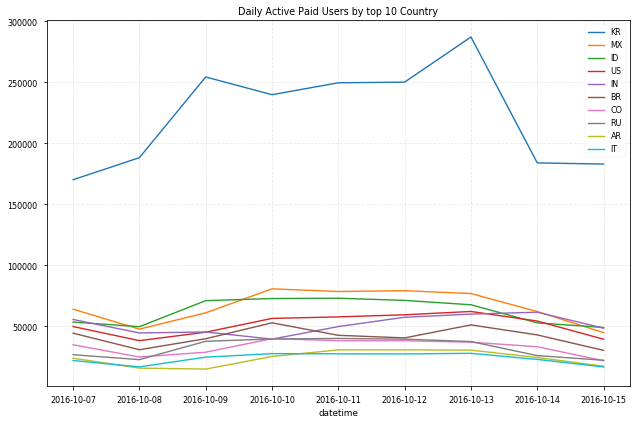

In [66]:
fig = plt.figure()

# top 10 countries only as index
cont_idx = df_cont_pivot.sum().sort_values(ascending=False)[:10].index 

# filter based on the index
df_cont_pivot[cont_idx].plot(figsize=(9,6));

plt.title("Daily Active Paid Users by top 10 Country")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

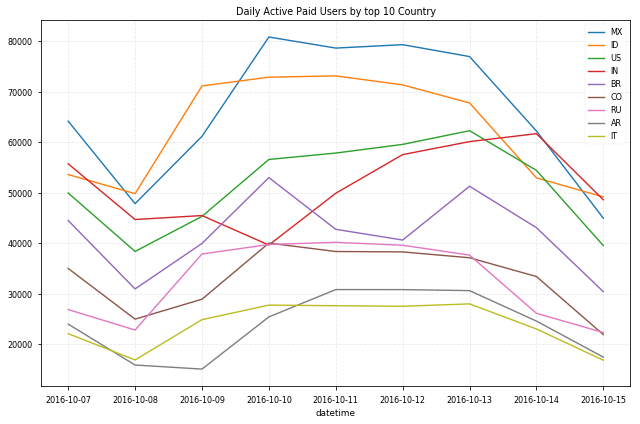

In [67]:
# except for KR: zoom in

df_cont_pivot[cont_idx[1:]].plot(figsize=(9,6));

plt.title("Daily Active Paid Users by top 10 Country")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')ㅇ
plt.legend()
plt.tight_layout()

In [68]:
df_cont_pivot[cont_idx]

countryCode,KR,MX,ID,US,IN,BR,CO,RU,AR,IT
datetime,,,,,,,,,,
2016-10-07,170188,64146,53571,49916,55696,44472,34974,26833,23955,22067
2016-10-08,188255,47803,49787,38350,44666,30920,24940,22782,15849,16854
2016-10-09,254370,61138,71116,45281,45449,39926,28880,37834,15045,24834
2016-10-10,239862,80809,72852,56560,39613,52965,39999,39725,25377,27717
2016-10-11,249595,78614,73112,57829,49868,42726,38331,40145,30792,27595
2016-10-12,250150,79291,71328,59542,57519,40600,38252,39569,30787,27485
2016-10-13,287115,76936,67749,62256,60093,51251,37094,37618,30588,27959
2016-10-14,183988,62189,52920,54396,61665,43051,33373,26093,24551,22994
2016-10-15,183004,44927,49136,39497,48567,30378,21870,22292,17414,16797


In [69]:
df_main_cont = df_all[df_all['countryCode'].isin(cont_idx) == True]

df_main_cont.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
6,2016-10-07,all,1,1,1,0,AR,23123
34,2016-10-07,all,1,1,1,0,ID,51667
53,2016-10-07,all,1,1,1,0,MX,60961
74,2016-10-07,all,1,1,1,0,US,42968
87,2016-10-07,all,1,1,1,1,CO,1


In [70]:
df_main_cont_free = df_main_cont.query("deviceTypeNo == 'ALL' & osTypeNo == 'ALL' \
                                        & aswTypeNo == 'ALL' & isPaid == '0'")

df_main_cont_free.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
5144,2016-10-07,all,ALL,ALL,ALL,0,BR,44430
5163,2016-10-07,all,ALL,ALL,ALL,0,IN,55674
5165,2016-10-07,all,ALL,ALL,ALL,0,IT,22034
5168,2016-10-07,all,ALL,ALL,ALL,0,KR,169306
14222,2016-10-07,all,ALL,ALL,ALL,0,CO,34972


<Figure size 432x288 with 0 Axes>

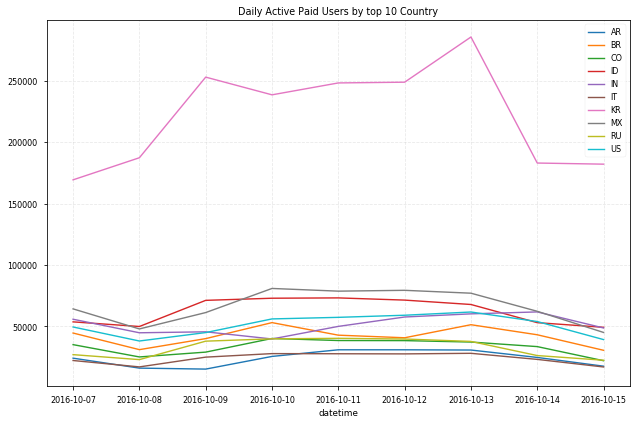

In [71]:
fig = plt.figure()

df_main_cont_free.groupby(["datetime", "countryCode"])['userCount'].sum().unstack().plot(figsize=(9,6));

plt.title("Daily Active Paid Users by top 10 Country")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

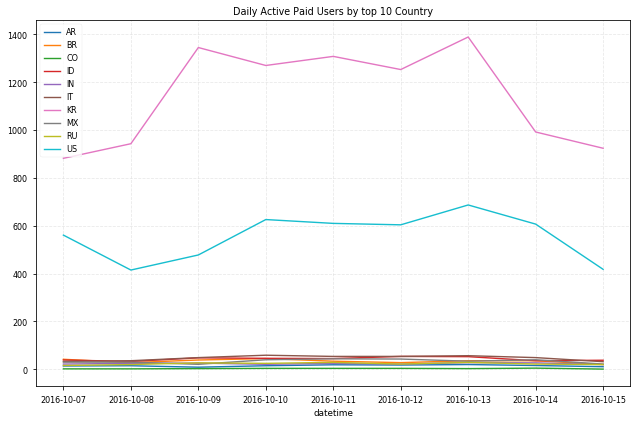

In [72]:
df_main_cont_paid = df_main_cont.query("deviceTypeNo == 'ALL' & osTypeNo == 'ALL' \
                                        & aswTypeNo == 'ALL' & isPaid == '1'")

df_main_cont_paid.groupby(["datetime", "countryCode"])['userCount'].sum().unstack().plot(figsize=(9,6));

plt.title("Daily Active Paid Users by top 10 Country")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### 1.9 EDA Summary
- 기존 DAU에 허수값 존재: DAU -> all(View+Edit+Export)으로 활동성 지표 변경 고려
- 활동성은 안드로이드가 절대적으로 높음 (Win > iOS > Mac)
- 무료 이용자 비율이 매우 높음 (특히 안드로이드)
- 유료 이용자의 경우 윈도우(PC) 사용 경향이 높은편
- 국가별 분석결과, 무료 및 유료 이용자 모두 한국이 많음 (유료의 경우 미국이 특히 높음)

## 2. 지표 개발 (Activation 을 측정하는 Single Index 개발)
 - 목적: 지표 수식 개발을 위해 Feature selection 진행 >> 중요도가 높은 feature를 조합(가중치부여)하여 index 개발
 - Feature Selection을 위해 데이터셋 가공 (전 주차 행동 및 다음 주차 Retention 여부*)
     - 데이터셋 종류
         - 특정 주의 사용행동
         - 그 다음주의 사용행동 & 방문 여부
         
### 2.1 File Info.
 - 유저id 별 특정 1주간 행동별 카운트
 - 변수
    - filecount: 이용한 파일수
    - opencount: 열람한 파일수
    - savecount: 저장한 파일수
    - exportcount: 내보내기 파일수
    - traffic: 사용량 트래픽(byte)
    - visitcount: 1주간 방문일수(최소 1일, 최대 7일)

In [73]:
tf = pd.read_csv("lc3.csv", index_col=0)

In [74]:
tf.head()

,iduser,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
0,10100000000584,13,31,2,0,28264552,21504,0,6
1,10100000001960,1,1,0,0,3863040,0,0,1
2,10100000011472,10,18,5,0,7401073,103685,0,5
3,10100000014080,1,1,0,0,1140036,0,0,1
4,10100000018848,6,21,0,0,9037651,0,0,4


In [75]:
tf.tail()

,iduser,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
2907614,10100046821969,1,1,0,0,16384,0,0,1
2907615,10100046822433,1,3,0,0,42597,0,0,1
2907616,10100046822649,2,11,0,0,1051719,0,0,1
2907617,10100046823345,1,1,0,0,1120691,0,0,1
2907618,10100046824385,1,1,0,0,6258176,0,0,1


In [76]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907619 entries, 0 to 2907618
Data columns (total 9 columns):
iduser           int64
filecount        int64
opencount        int64
savecount        int64
exportcount      int64
viewtraffic      int64
edittraffic      int64
exporttraffic    int64
visitcount       int64
dtypes: int64(9)
memory usage: 221.8 MB


### 2.2 데이터 전처리
- 인덱스 설정
- 트래픽 단위 변환
- 아웃라이어 제거
- 파생변수 생성
- 테이블 조인

In [77]:
tf.iduser.is_unique # duplications check

True

In [78]:
tf.set_index("iduser", inplace=True)

In [79]:
tf.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
iduser,,,,,,,,
10100000000584,13,31,2,0,28264552,21504,0,6
10100000001960,1,1,0,0,3863040,0,0,1
10100000011472,10,18,5,0,7401073,103685,0,5
10100000014080,1,1,0,0,1140036,0,0,1
10100000018848,6,21,0,0,9037651,0,0,4


In [80]:
# byte -> mb
tf.viewtraffic = (tf.viewtraffic/1024/1024).round(0).astype(int)
tf.edittraffic = (tf.edittraffic/1024/1024).round(0).astype(int)
tf.exporttraffic = (tf.exporttraffic/1024/1024).round(0).astype(int)

In [81]:
tf.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
iduser,,,,,,,,
10100000000584,13,31,2,0,27,0,0,6
10100000001960,1,1,0,0,4,0,0,1
10100000011472,10,18,5,0,7,0,0,5
10100000014080,1,1,0,0,1,0,0,1
10100000018848,6,21,0,0,9,0,0,4


In [82]:
tf.describe().apply(lambda x: x.round(2))

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
count,2907619.00,2907619.00,2907619.00,2907619.0,2907619.00,2907619.00,2907619.00,2907619.00
mean,2.42,6.09,0.55,0.0,5.65,0.18,0.00,1.85
std,11.79,385.97,18.67,0.2,358.02,5.59,0.17,1.22
min,1.00,1.00,0.00,0.0,-2.00,0.00,0.00,1.00
25%,1.00,1.00,0.00,0.0,0.00,0.00,0.00,1.00
50%,2.00,3.00,0.00,0.0,1.00,0.00,0.00,1.00
75%,3.00,7.00,0.00,0.0,4.00,0.00,0.00,2.00
max,19808.00,657925.00,30812.00,94.0,609383.00,8469.00,105.00,7.00


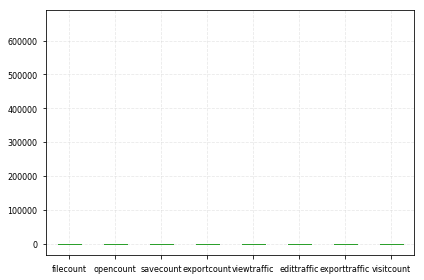

In [83]:
tf.plot(kind='box')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

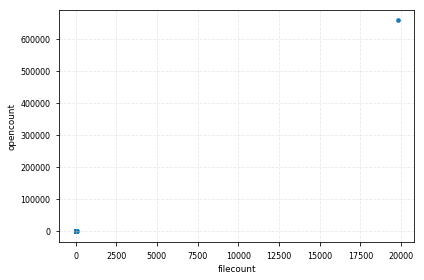

In [84]:
tf.plot(kind='scatter', x='filecount', y='opencount');

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

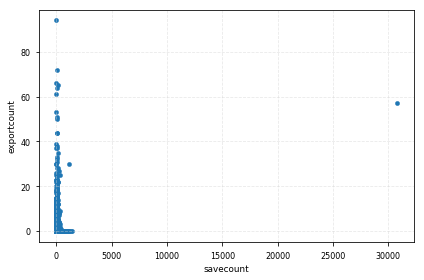

In [85]:
tf.plot(kind='scatter', x='savecount', y='exportcount');

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

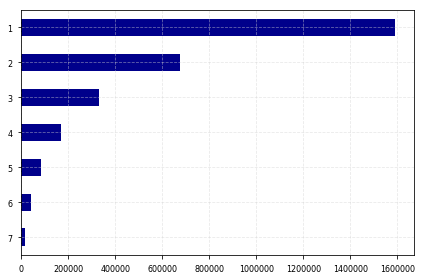

In [86]:
# 방문일수 분포 확인
tf['visitcount'].value_counts().sort_values().plot(kind='barh', color='darkblue')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [87]:
tf_no_viscnt = tf.drop("visitcount", axis=1)

In [88]:
tf_no_viscnt.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic
iduser,,,,,,,
10100000000584,13,31,2,0,27,0,0
10100000001960,1,1,0,0,4,0,0
10100000011472,10,18,5,0,7,0,0
10100000014080,1,1,0,0,1,0,0
10100000018848,6,21,0,0,9,0,0


In [89]:
# ignore Zero fun
def remove_outlier_std(df):
    for i in range(0, len(df.iloc[1])):
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))]
    return df

In [90]:
tf_no_viscnt1 = remove_outlier_std(tf_no_viscnt)

In [91]:
# max is 0?
tf_no_viscnt1.describe().apply(lambda x: x.round(2))

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic
count,2781951.00,2781951.00,2781951.00,2781951.0,2781951.00,2781951.00,2781951.0
mean,2.27,4.78,0.23,0.0,3.44,0.03,0.0
std,1.75,5.33,0.87,0.0,7.03,0.21,0.0
min,1.00,1.00,0.00,0.0,-1.00,0.00,0.0
25%,1.00,1.00,0.00,0.0,0.00,0.00,0.0
50%,2.00,3.00,0.00,0.0,1.00,0.00,0.0
75%,3.00,6.00,0.00,0.0,3.00,0.00,0.0
max,22.00,36.00,9.00,0.0,53.00,3.00,0.0


In [92]:
# ignore Zero fun
def remove_outlier_std(df):
    for i in range(0, len(df.iloc[1])):
        df.iloc[:,i] = df.iloc[:,i].replace(0, np.NaN)
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))]
    return df.fillna(0)

In [93]:
tf_no_viscnt1 = remove_outlier_std(tf_no_viscnt)

In [94]:
tf_no_viscnt1.describe().apply(lambda x: x.round(2))

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic
count,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00
mean,2.30,4.95,0.34,0.00,3.84,0.10,0.00
std,1.79,5.56,1.57,0.08,8.35,0.89,0.07
min,1.00,1.00,0.00,0.00,-2.00,0.00,0.00
25%,1.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,3.00,0.00,0.00,1.00,0.00,0.00
75%,3.00,6.00,0.00,0.00,3.00,0.00,0.00
max,22.00,36.00,28.00,10.00,72.00,22.00,23.00


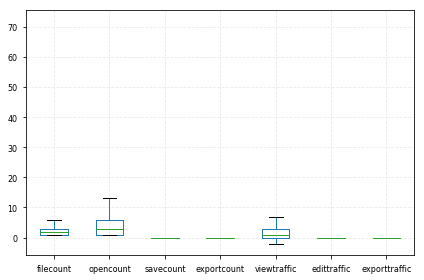

In [95]:
tf_no_viscnt1.plot(kind='box')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [96]:
tf_no_viscnt1.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic
iduser,,,,,,,
10100000000584,13,31,2.0,0.0,27.0,0.0,0.0
10100000001960,1,1,0.0,0.0,4.0,0.0,0.0
10100000011472,10,18,5.0,0.0,7.0,0.0,0.0
10100000014080,1,1,0.0,0.0,1.0,0.0,0.0
10100000018848,6,21,0.0,0.0,9.0,0.0,0.0


In [97]:
tf.visitcount.head()

iduser
10100000000584    6
10100000001960    1
10100000011472    5
10100000014080    1
10100000018848    4
Name: visitcount, dtype: int64

In [98]:
# join original visit days with dataset without outliers
df2 = tf_no_viscnt1.merge(tf.visitcount.to_frame(), right_index=True, left_index=True)

In [99]:
df2.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
iduser,,,,,,,,
10100000000584,13,31,2.0,0.0,27.0,0.0,0.0,6
10100000001960,1,1,0.0,0.0,4.0,0.0,0.0,1
10100000011472,10,18,5.0,0.0,7.0,0.0,0.0,5
10100000014080,1,1,0.0,0.0,1.0,0.0,0.0,1
10100000018848,6,21,0.0,0.0,9.0,0.0,0.0,4


In [100]:
df2['totalcount'] = df2['filecount'] + df2['savecount'] + df2['exportcount']
df2['totaltraffic'] = df2['viewtraffic'] + df2['edittraffic'] + df2['exporttraffic']

In [101]:
df2['count_per_visit'] = (df2['totalcount'] / df2['visitcount']).round(2)
df2['traffic_per_visit'] = (df2['totaltraffic'] / df2['visitcount']).round(2)

In [102]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839612 entries, 10100000000584 to 10100046824385
Data columns (total 12 columns):
filecount            int64
opencount            int64
savecount            float64
exportcount          float64
viewtraffic          float64
edittraffic          float64
exporttraffic        float64
visitcount           int64
totalcount           float64
totaltraffic         float64
count_per_visit      float64
traffic_per_visit    float64
dtypes: float64(9), int64(3)
memory usage: 281.6 MB


In [103]:
df2 = df2.apply(lambda x: x.astype(int))

In [104]:
df2.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount,totalcount,totaltraffic,count_per_visit,traffic_per_visit
iduser,,,,,,,,,,,,
10100000000584,13,31,2,0,27,0,0,6,15,27,2,4
10100000001960,1,1,0,0,4,0,0,1,1,4,1,4
10100000011472,10,18,5,0,7,0,0,5,15,7,3,1
10100000014080,1,1,0,0,1,0,0,1,1,1,1,1
10100000018848,6,21,0,0,9,0,0,4,6,9,1,2


In [105]:
df2.describe().round(2)

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount,totalcount,totaltraffic,count_per_visit,traffic_per_visit
count,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00
mean,2.30,4.95,0.34,0.00,3.84,0.10,0.00,1.80,2.65,3.94,1.35,2.12
std,1.79,5.56,1.57,0.08,8.35,0.89,0.07,1.15,2.61,8.54,0.97,5.14
min,1.00,1.00,0.00,0.00,-2.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
25%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
50%,2.00,3.00,0.00,0.00,1.00,0.00,0.00,1.00,2.00,1.00,1.00,0.00
75%,3.00,6.00,0.00,0.00,3.00,0.00,0.00,2.00,3.00,4.00,1.00,2.00
max,22.00,36.00,28.00,10.00,72.00,22.00,23.00,7.00,46.00,94.00,33.00,92.00


In [106]:
# 2ND week dataset
tf_2nd_wk = pd.read_csv("lc_2w.csv", index_col=0).set_index("iduser")

In [107]:
tf_2nd_wk.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
iduser,,,,,,,,
10100000000584,5,11,0,0,12821280,0,0,4
10100000059936,9,37,0,0,10818217,0,0,6
10100000314888,2,4,0,0,1707312,0,0,1
10100000348368,3,3,2,0,80678,8930,0,3
10100000538736,2,3,1,0,203776,101888,0,2


In [108]:
tf_2nd_wk['flag'] = True

In [109]:
tf_2nd_wk.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount,flag
iduser,,,,,,,,,
10100000000584,5,11,0,0,12821280,0,0,4,True
10100000059936,9,37,0,0,10818217,0,0,6,True
10100000314888,2,4,0,0,1707312,0,0,1,True
10100000348368,3,3,2,0,80678,8930,0,3,True
10100000538736,2,3,1,0,203776,101888,0,2,True


In [110]:
tf_2nd_wk['flag'].to_frame().head(10)

,flag
iduser,
10100000000584,True
10100000059936,True
10100000314888,True
10100000348368,True
10100000538736,True
10100001220336,True
10100001384088,True
10100003220648,True
10100003865288,True


In [111]:
df3 = pd.merge(df2, tf_2nd_wk['flag'].to_frame(), left_index=True, right_index=True, how='left').fillna(False)

In [112]:
df3.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount,totalcount,totaltraffic,count_per_visit,traffic_per_visit,flag
iduser,,,,,,,,,,,,,
10100000000584,13,31,2,0,27,0,0,6,15,27,2,4,True
10100000001960,1,1,0,0,4,0,0,1,1,4,1,4,False
10100000011472,10,18,5,0,7,0,0,5,15,7,3,1,True
10100000014080,1,1,0,0,1,0,0,1,1,1,1,1,False
10100000018848,6,21,0,0,9,0,0,4,6,9,1,2,True


In [113]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839612 entries, 10100000000584 to 10100046824385
Data columns (total 13 columns):
filecount            int64
opencount            int64
savecount            int64
exportcount          int64
viewtraffic          int64
edittraffic          int64
exporttraffic        int64
visitcount           int64
totalcount           int64
totaltraffic         int64
count_per_visit      int64
traffic_per_visit    int64
flag                 bool
dtypes: bool(1), int64(12)
memory usage: 364.3 MB


In [114]:
df3.flag.value_counts()

True     1574411
False    1265201
Name: flag, dtype: int64

### 2.3 변수별 영향력 도출

- 데이터 표준화 (scaling)
- 모델 학습 및 예측
- 로지스틱 회귀를 이용한 coefficient 도출
- 랜덤포레스트를 이용한 영향력 도출
- 반복적 변수 제거 방식을 이용한 변수별 중요도 도출

In [115]:
from sklearn.model_selection import train_test_split

X = df3.drop("flag", axis=1)
y = df3.flag

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [116]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2129709, 12)
(2129709,)
(709903, 12)
(709903,)


In [117]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [118]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [119]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_rg = LogisticRegression().fit(X_train_scaled, y_train)

In [121]:
cross_val_score(log_rg, X_train_scaled, y_train, cv=5)

array([0.6378506 , 0.63859868, 0.63854938, 0.64007926, 0.6383208 ])

In [122]:
# a simple way to test
log_rg.score(X_test_scaled, y_test)

0.6382928371904331

In [123]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, log_rg.predict(X_test_scaled)))

             precision    recall  f1-score   support

      False       0.58      0.71      0.64    316200
       True       0.71      0.58      0.64    393703

avg / total       0.65      0.64      0.64    709903



In [124]:
print(confusion_matrix(y_test, log_rg.predict(X_test_scaled)))

[[223368  92832]
 [163945 229758]]


In [125]:
print(log_rg.coef_)

[[ 1.14736432  0.64492864 -0.1531667  -0.44338886 -0.08018011 -0.30424474
  -0.05445308  3.61525726  0.3416021  -0.14048687  0.15782704  0.76180677]]


In [126]:
print(X.columns.values)

['filecount' 'opencount' 'savecount' 'exportcount' 'viewtraffic'
 'edittraffic' 'exporttraffic' 'visitcount' 'totalcount' 'totaltraffic'
 'count_per_visit' 'traffic_per_visit']


In [127]:
feature_importance_lr = pd.DataFrame(zip(X.columns.values, log_rg.coef_.ravel()))
feature_importance_lr.columns = ['feature', 'coef']
feature_importance_lr.sort_values("coef", ascending=False, inplace=True)

In [128]:
feature_importance_lr

,feature,coef
7,visitcount,3.615257
0,filecount,1.147364
11,traffic_per_visit,0.761807
1,opencount,0.644929
8,totalcount,0.341602
10,count_per_visit,0.157827
6,exporttraffic,-0.054453
4,viewtraffic,-0.080180
9,totaltraffic,-0.140487
2,savecount,-0.153167


In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rf = RandomForestClassifier(n_estimators=10).fit(X_train_scaled, y_train)

In [131]:
cross_val_score(rf, X_train_scaled, y_train, cv=3)

array([0.63142622, 0.63190182, 0.63316063])

In [132]:
rf.score(X_test_scaled, y_test)

0.6330470500899419

In [133]:
print(classification_report(y_test, rf.predict(X_test_scaled)))

             precision    recall  f1-score   support

      False       0.57      0.69      0.63    316200
       True       0.70      0.59      0.64    393703

avg / total       0.65      0.63      0.63    709903



In [134]:
feature_importance_rf = pd.DataFrame(zip(X.columns.values, rf.feature_importances_))
feature_importance_rf.columns = ['feature', 'importance']
feature_importance_rf.sort_values("importance", ascending=False, inplace=True)

In [135]:
feature_importance_rf

,feature,importance
7,visitcount,0.331980
1,opencount,0.199925
0,filecount,0.158538
8,totalcount,0.142648
4,viewtraffic,0.050827
9,totaltraffic,0.037315
11,traffic_per_visit,0.023139
10,count_per_visit,0.019532
5,edittraffic,0.018018
2,savecount,0.015729


In [136]:
from sklearn.feature_selection import RFE

In [137]:
select = RFE(RandomForestClassifier(n_estimators=5, random_state=42), n_features_to_select = 5)

In [138]:
select.fit(X_train_scaled, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
  n_features_to_select=5, step=1, verbose=0)

In [139]:
feature_importance_rfe = pd.DataFrame(zip(X.columns.values, select.get_support()))
feature_importance_rfe.columns = ['feature', 'importance']
feature_importance_rfe.sort_values("importance", ascending=False, inplace=True)

In [140]:
feature_importance_rfe

,feature,importance
0,filecount,True
1,opencount,True
4,viewtraffic,True
7,visitcount,True
9,totaltraffic,True
2,savecount,False
3,exportcount,False
5,edittraffic,False
6,exporttraffic,False
8,totalcount,False


### 2.4 그룹별 리텐션 여부 데이터셋
- 주요 변수 1개만 선정: visitcount (range: 1~7)
- group: 유저의 visitcount 기준으로 그룹 부여
    - 만약 특정주에 1일 들어왔으면, group = 1
- isnextvisit: 다음주의 재방문 여부
    - 0: 방문 안함
    - 1: 방문함
- day: group 산정일 기준
    - day 의 날짜 이전 일주일간의 데이터로 group 산정

In [2]:
next_ret = pd.read_csv("df_lc.csv", index_col=0)

In [3]:
next_ret.head()

,group,isnextvisit,day
0,1,0,2016-10-15
1,1,0,2016-10-15
2,2,1,2016-10-15
3,2,1,2016-10-15
4,1,0,2016-10-15


In [4]:
next_ret.tail()

,group,isnextvisit,day
9420542,1,0,2016-10-19
9420543,1,1,2016-10-19
9420544,2,1,2016-10-19
9420545,3,0,2016-10-19
9420546,1,0,2016-10-19


In [5]:
next_ret.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9420547 entries, 0 to 9420546
Data columns (total 3 columns):
group          int64
isnextvisit    int64
day            object
dtypes: int64(2), object(1)
memory usage: 287.5+ MB


In [6]:
next_ret['day'] = pd.to_datetime(next_ret['day'])

In [7]:
next_ret.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9420547 entries, 0 to 9420546
Data columns (total 3 columns):
group          int64
isnextvisit    int64
day            datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 287.5 MB


In [8]:
next_ret.day.value_counts().sort_index()

2016-09-27    296079
2016-09-28    299358
2016-09-29    301737
2016-09-30    304003
2016-10-01    302862
2016-10-02    302628
2016-10-03    302787
2016-10-04    302598
2016-10-05    302986
2016-10-06    301461
               ...  
2016-10-17    323232
2016-10-18    326945
2016-10-19    330996
2016-10-20    334786
2016-10-21    338143
2016-10-22    340399
2016-10-23    338552
2016-10-24    337666
2016-10-25    336850
2016-10-26    337398
Name: day, Length: 30, dtype: int64

In [148]:
next_ret_tb = next_ret.groupby(['group', 'isnextvisit'])['group'].count().unstack()
next_ret_tb.columns = ['churn', 'retention']

next_ret_tb

,churn,retention
group,,
1,3465785,2118215
2,705404,1255567
3,209120,742073
4,63628,429373
5,18131,239102
6,4593,118940
7,876,49740


In [149]:
next_ret_tb1 = next_ret_tb.apply(lambda x: x/x.sum() * 100, axis=1).round(2)
next_ret_tb1.columns = ['churn', 'retention']
next_ret_tb1.reset_index(inplace=True)

next_ret_tb1

,group,churn,retention
0,1,62.07,37.93
1,2,35.97,64.03
2,3,21.99,78.01
3,4,12.91,87.09
4,5,7.05,92.95
5,6,3.72,96.28
6,7,1.73,98.27


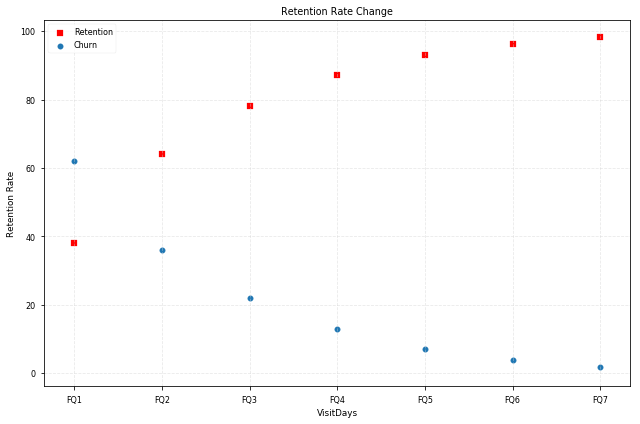

In [150]:
fig, ax = plt.subplots(figsize=(9,6))

plt.scatter(next_ret_tb1.group, next_ret_tb1.retention, color='r', label="Retention", marker=',')
plt.scatter(next_ret_tb1.group, next_ret_tb1.churn, label="Churn")

plt.title("Retention Rate Change")
plt.ylabel("Retention Rate")
plt.xlabel("VisitDays")
plt.xticks([1,2,3,4,5,6,7], ['FQ1', 'FQ2', 'FQ3', 'FQ4', 'FQ5', 'FQ6', 'FQ7'])
plt.legend()
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

## 3. 스코어 산출 및 대시보드 구축

- Logistic regression에서 베타값 활용 ✓
    - reference: http://blog.yhat.com/posts/logistic-regression-and-python.html
- another option: Random Forest's Feature Importance

In [151]:
next_ret.head()

,group,isnextvisit,day
0,1,0,2016-10-15
1,1,0,2016-10-15
2,2,1,2016-10-15
3,2,1,2016-10-15
4,1,0,2016-10-15


In [152]:
next_ret.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9420547 entries, 0 to 9420546
Data columns (total 3 columns):
group          int64
isnextvisit    int64
day            datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 287.5 MB


In [153]:
#next_ret['group'] = next_ret['group'].astype(str)
next_ret['isnextvisit'] = next_ret['isnextvisit'].astype(str)

In [154]:
next_ret.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9420547 entries, 0 to 9420546
Data columns (total 3 columns):
group          int64
isnextvisit    object
day            datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 287.5+ MB


In [155]:
# 하루치 데이터로 베타값 산출
firstday = '2016-09-27'

next_ret_firstday = next_ret[next_ret['day'] == firstday].drop('day', axis=1)

next_ret_firstday.head()

,group,isnextvisit
7885260,1,1
7885261,1,1
7885262,4,1
7885263,1,0
7885264,1,1


In [156]:
next_ret_firstday = pd.get_dummies(next_ret_firstday['group'], prefix='FQ').join(next_ret_firstday.isnextvisit)

In [157]:
next_ret_firstday['intercept'] = 1.0

In [158]:
next_ret_firstday.head()

,FQ_1,FQ_2,FQ_3,FQ_4,FQ_5,FQ_6,FQ_7,isnextvisit,intercept
7885260,1,0,0,0,0,0,0,1,1.0
7885261,1,0,0,0,0,0,0,1,1.0
7885262,0,0,0,1,0,0,0,1,1.0
7885263,1,0,0,0,0,0,0,0,1.0
7885264,1,0,0,0,0,0,0,1,1.0


In [159]:
from sklearn.model_selection import train_test_split

X = next_ret_firstday.drop(['isnextvisit', 'FQ_1'], axis=1)
y = next_ret_firstday.isnextvisit

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [160]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(222059, 7)
(74020, 7)
(222059,)
(74020,)


In [161]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

In [162]:
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.670411917553443
0.6700891650905161


In [163]:
print(logreg.coef_)

[[ 1.14570858  1.80920529  2.45727345  3.14022694  3.75355032  4.12619015
  -0.25784877]]


In [164]:
pd.DataFrame(zip(X_train.columns, logreg.coef_.flatten()), columns=['features', 'coef'])

,features,coef
0,FQ_2,1.145709
1,FQ_3,1.809205
2,FQ_4,2.457273
3,FQ_5,3.140227
4,FQ_6,3.753550
5,FQ_7,4.126190
6,intercept,-0.257849


In [283]:
# check p-values via statsmodel
import statsmodels.api as sm

dates = pd.to_datetime('2016-09-27')

subset = next_ret1[next_ret1['day'] == dates]
subset['intercept'] = 1.0

X = subset.drop(['isnextvisit', 'day'], axis=1)
y = subset.isnextvisit

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [295]:
logreg = sm.Logit(y_train.astype(float), X_train.astype(float))
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.613638
         Iterations 8


In [172]:
# weight on each cols
beta.mean()

FQ_2         1.066705
FQ_3         1.756115
FQ_4         2.398564
FQ_5         3.060988
FQ_6         3.717998
FQ_7         4.364229
intercept   -0.244936
dtype: float64

In [296]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            isnextvisit   No. Observations:               222059
Model:                          Logit   Df Residuals:                   222052
Method:                           MLE   Df Model:                            6
Date:                Fri, 13 Jul 2018   Pseudo R-squ.:                  0.1142
Time:                        23:57:51   Log-Likelihood:            -1.3626e+05
converged:                       True   LL-Null:                   -1.5383e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FQ_2           1.1463      0.011    100.845      0.000       1.124       1.169
FQ_3           1.8102      0.018    101.179      0.000       1.775       1.845
FQ_4           2.4600      0.030     80.677      0.000       2.400       2.520
FQ_5           3.1506      0.056     56.567      0.000       3.041       3.260
FQ_6           3.7948      0.106     35.875      0.000       3.587       4.002
FQ_7           4.2839      0.202     21.168      0.000       3.887       4.681
intercept     -0.5162      0.006    -92.644      0.000      -0.527      -0.505
==============================================================================
"""

In [165]:
# 여러 날의 데이터로 가중치 평균 산출
next_ret1 = pd.get_dummies(next_ret.group, prefix='FQ')\
              .join(next_ret.isnextvisit)\
              .join(next_ret.day)\
              .drop("FQ_1", axis=1)

next_ret1.head()

,FQ_2,FQ_3,FQ_4,FQ_5,FQ_6,FQ_7,isnextvisit,day
0,0,0,0,0,0,0,0,2016-10-15
1,0,0,0,0,0,0,0,2016-10-15
2,1,0,0,0,0,0,1,2016-10-15
3,1,0,0,0,0,0,1,2016-10-15
4,0,0,0,0,0,0,0,2016-10-15


In [167]:
from datetime import timedelta

dates = pd.to_datetime('2016-09-27')

for i in range(0, next_ret1['day'].nunique()):
    subset = next_ret1[next_ret1['day'] == dates]
    subset['intercept'] = 1.0

    X = subset.drop(['isnextvisit', 'day'], axis=1)
    y = subset.isnextvisit

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    logreg = LogisticRegression().fit(X_train, y_train)
  
    print(logreg.score(X_test, y_test))
    print(logreg.coef_.flatten())    
    dates = dates + timedelta(days=1)

0.6700891650905161
[ 1.14570858  1.80920529  2.45727345  3.14022694  3.75355032  4.12619015
 -0.25784877]
0.672434526990914
[ 1.11568282  1.8468642   2.4845343   3.15180742  3.68094125  4.3100807
 -0.26099694]
0.6728309140319481
[ 1.10056868  1.80902799  2.43381036  3.11158386  3.53213236  4.11971083
 -0.26512443]
0.6713332719306325
[ 1.09078062  1.79254842  2.41497572  2.9496268   3.60716909  4.01651401
 -0.27458222]
0.673543240530403
[ 1.06467068  1.75657096  2.37187649  3.03111808  3.61055555  4.46699015
 -0.26385663]
0.6704733203801366
[ 1.06081047  1.77171587  2.38139694  3.04894271  3.65883192  4.56734446
 -0.26928585]
0.6714929257434245
[ 1.04466738  1.71160191  2.33766225  3.04009477  3.67024511  4.19776935
 -0.25867789]
0.669477858559154
[ 1.03966601  1.75072356  2.33951477  2.98548553  3.71624335  4.38433341
 -0.24715831]
0.6684753191545539
[ 1.02784317  1.76326807  2.38897483  3.06567772  3.78151283  4.61373041
 -0.24426573]
0.6675954674521668
[ 1.05108478  1.7005993   2.370

In [168]:
dates = pd.to_datetime('2016-09-27')

score = []
beta = pd.DataFrame()

for i in range(0, next_ret1['day'].nunique()):
    subset = next_ret1[next_ret1['day'] == dates]
    subset['intercept'] = 1.0

    X = subset.drop(['isnextvisit', 'day'], axis=1)
    y = subset.isnextvisit
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    logreg = LogisticRegression().fit(X_train, y_train)
  
    score.append(logreg.score(X_test, y_test))
    beta = beta.append(pd.DataFrame(logreg.coef_))

    dates = dates + timedelta(days=1)

In [169]:
print(np.array(score).mean())

0.6689002160196077


In [170]:
beta = beta.reset_index(drop=True)
beta.columns = X_train.columns

In [171]:
beta

,FQ_2,FQ_3,FQ_4,FQ_5,FQ_6,FQ_7,intercept
0,1.145709,1.809205,2.457273,3.140227,3.753550,4.126190,-0.257849
1,1.115683,1.846864,2.484534,3.151807,3.680941,4.310081,-0.260997
2,1.100569,1.809028,2.433810,3.111584,3.532132,4.119711,-0.265124
3,1.090781,1.792548,2.414976,2.949627,3.607169,4.016514,-0.274582
4,1.064671,1.756571,2.371876,3.031118,3.610556,4.466990,-0.263857
5,1.060810,1.771716,2.381397,3.048943,3.658832,4.567344,-0.269286
6,1.044667,1.711602,2.337662,3.040095,3.670245,4.197769,-0.258678
7,1.039666,1.750724,2.339515,2.985486,3.716243,4.384333,-0.247158
8,1.027843,1.763268,2.388975,3.065678,3.781513,4.613730,-0.244266
9,1.051085,1.700599,2.370637,2.988328,3.759884,4.458033,-0.236530


###  2.5 변수별 가중치 반영하여 스코어 산출

In [173]:
next_ret.head()

,group,isnextvisit,day
0,1,0,2016-10-15
1,1,0,2016-10-15
2,2,1,2016-10-15
3,2,1,2016-10-15
4,1,0,2016-10-15


In [253]:
daily_score = next_ret.groupby(['day', 'group']).size().unstack()

daily_score.head()

group,1,2,3,4,5,6,7
day,,,,,,,
2016-09-27,183357,59988,27280,13607,6922,3450,1475
2016-09-28,182610,61218,29023,14150,7196,3649,1512
2016-09-29,181451,61859,29978,15378,7747,3748,1576
2016-09-30,179801,62871,30457,16118,8839,4139,1778
2016-10-01,178675,62491,30691,16158,8759,4389,1699


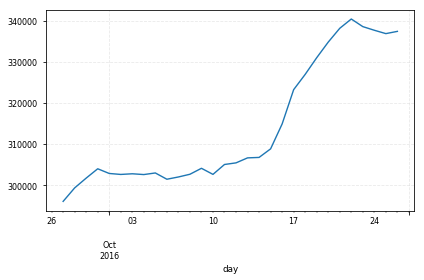

In [259]:
# without weights, a simple sum
daily_score.sum(axis=1).plot()

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [260]:
weight = [x for x in beta.mean()][:-1]
weight.insert(0, 1.0)

weight

[1.0,
 1.066705099783948,
 1.7561146797002036,
 2.3985636793251235,
 3.060987947087584,
 3.717998431838481,
 4.364229340984162]

In [261]:
for i in range(1, 7):
    daily_score.iloc[:, i] = (daily_score.iloc[:, i] * weight[i-0]).apply(lambda x: round(x, 2))

In [262]:
daily_score.head()

group,1,2,3,4,5,6,7
day,,,,,,,
2016-09-27,183357,63989.51,47906.81,32637.26,21188.16,12827.09,6437.24
2016-09-28,182610,65301.55,50967.72,33939.68,22026.87,13566.98,6598.71
2016-09-29,181451,65985.31,52644.81,36885.11,23713.47,13935.06,6878.03
2016-09-30,179801,67064.82,53485.98,38660.05,27056.07,15388.80,7759.60
2016-10-01,178675,66659.47,53896.92,38755.99,26811.19,16318.30,7414.83


In [263]:
daily_score['kui'] = daily_score.sum(axis=1)

In [264]:
daily_score.head()

group,1,2,3,4,5,6,7,kui
day,,,,,,,,
2016-09-27,183357,63989.51,47906.81,32637.26,21188.16,12827.09,6437.24,368343.07
2016-09-28,182610,65301.55,50967.72,33939.68,22026.87,13566.98,6598.71,375011.51
2016-09-29,181451,65985.31,52644.81,36885.11,23713.47,13935.06,6878.03,381492.79
2016-09-30,179801,67064.82,53485.98,38660.05,27056.07,15388.80,7759.60,389216.32
2016-10-01,178675,66659.47,53896.92,38755.99,26811.19,16318.30,7414.83,388531.70


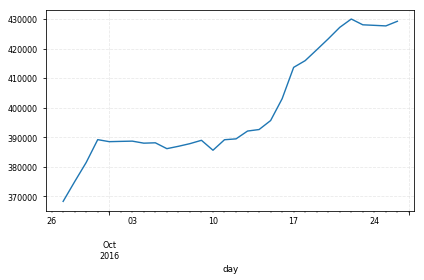

In [265]:
daily_score['kui'].plot()

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

- reference
    - http://blog.yhat.com/posts/logistic-regression-and-python.html
    - http://www.appstate.edu/~whiteheadjc/service/logit/intro.htm
    - http://www.cbgstat.com/method_logistic_regression_analysis/logistic_regression_analysis.php

In [267]:
# get odds ratio
dates = pd.to_datetime('2016-09-27')

score = []
beta = pd.DataFrame()

for i in range(0, next_ret1['day'].nunique()):
    subset = next_ret1[next_ret1['day'] == dates]
    subset['intercept'] = 1.0

    X = subset.drop(['isnextvisit', 'day'], axis=1)
    y = subset.isnextvisit
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    logreg = LogisticRegression().fit(X_train, y_train)
  
    score.append(logreg.score(X_test, y_test))
    beta = beta.append(pd.DataFrame(np.exp(logreg.coef_)))

    dates = dates + timedelta(days=1)

In [268]:
beta.mean()

0     2.907940
1     5.797399
2    11.021967
3    21.405935
4    41.463376
5    79.857972
6     0.783098
dtype: float64

In [325]:
daily_score = next_ret.groupby(['day', 'group']).size().unstack()

daily_score.head()

group,1,2,3,4,5,6,7
day,,,,,,,
2016-09-27,183357,59988,27280,13607,6922,3450,1475
2016-09-28,182610,61218,29023,14150,7196,3649,1512
2016-09-29,181451,61859,29978,15378,7747,3748,1576
2016-09-30,179801,62871,30457,16118,8839,4139,1778
2016-10-01,178675,62491,30691,16158,8759,4389,1699


In [326]:
weight = [x for x in beta.mean()][:-1]
weight.insert(0, 1.0)

weight

[1.0,
 2.9079397405050025,
 5.7973992041135345,
 11.02196712318036,
 21.40593531880819,
 41.4633756230961,
 79.85797249850933]

In [327]:
for i in range(1, 7):
    daily_score.iloc[:, i] = (daily_score.iloc[:, i] * weight[i-0]).apply(lambda x: round(x, 2))

In [328]:
daily_score['kui'] = ((daily_score.sum(axis=1))/10000).round(0).astype(int)

In [329]:
daily_score.head()

group,1,2,3,4,5,6,7,kui
day,,,,,,,,
2016-09-27,183357,174441.49,158153.05,149975.91,148171.88,143048.65,117790.51,107
2016-09-28,182610,178018.26,168257.92,155960.83,154037.11,151299.86,120745.25,111
2016-09-29,181451,179882.24,173794.43,169495.81,165831.78,155404.73,125856.16,115
2016-09-30,179801,182825.08,176571.39,177652.07,189207.06,171616.91,141987.48,122
2016-10-01,178675,181720.06,177927.98,178092.94,187494.59,181982.76,135678.70,122


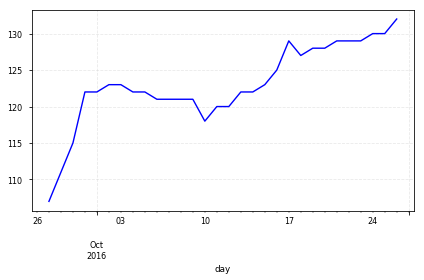

In [334]:
daily_score['kui'].plot(c='blue')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

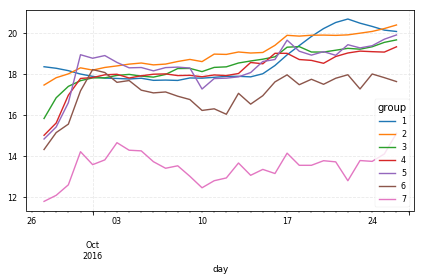

In [335]:
(daily_score.iloc[:,:7]/10000).plot()

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### 3. Dashboard 생성
 - Redash: https://redash.io/
 - plotly: https://plot.ly/feed/#/
     - line chart example: https://plot.ly/python/line-charts/
 - creat a dashboard: https://plot.ly/create/

In [354]:
#daily_score.to_csv('daily_score.csv')